In [2]:
import pandas as pd

# Percorso del file
file_path = r"C:/Users/d.dipadova/ClassificationOfVariableStars/VariableStarClassification/data/PLV_LINEAR.csv"

# Carica solo le prime 10 righe per diagnosticare la struttura
data = pd.read_csv(file_path, sep=";")

data.head()







#  LINEARobjectID  LCtype         P     A   mmed  stdev   rms  Lchi2pdf  \
0 NaN            2522       5  0.238812  0.68  17.00   0.22  0.25     0.543   
1 NaN            4822       5  0.403043  0.32  14.19   0.11  0.12     2.102   
2 NaN           17249       5  0.252815  0.57  16.16   0.18  0.19     0.876   
3 NaN           18469       5  0.428962  0.46  14.17   0.16  0.20     2.501   
4 NaN           28800       5  0.332774  0.28  15.31   0.11  0.11     1.214   

   nObs  skew  kurt     LR  CUF  t2  t3  
0   225  0.75  0.11  0.317    1   0   0  
1   126  0.46 -0.89  1.868    1   0   0  
2   178  1.16  0.44  0.584    1   0   0  
3   200  0.70 -0.59  2.320    1   0   0  
4   240  1.84  7.94  0.960    1   0   0

## Data  Cleaning

In [3]:
data.isnull().sum()  # il dataset non presenta valori mancanti


#                 7194
LINEARobjectID       0
LCtype               0
P                    0
A                    0
mmed                 0
stdev                0
rms                  0
Lchi2pdf             0
nObs                 0
skew                 0
kurt                 0
LR                   0
CUF                  0
t2                   0
t3                   0
dtype: int64

In [4]:
data = data.drop_duplicates()  # Rimuove righe duplicate
data = data.drop("#", axis=1)
data.head()

LINEARobjectID  LCtype         P     A   mmed  stdev   rms  Lchi2pdf  nObs  \
0            2522       5  0.238812  0.68  17.00   0.22  0.25     0.543   225   
1            4822       5  0.403043  0.32  14.19   0.11  0.12     2.102   126   
2           17249       5  0.252815  0.57  16.16   0.18  0.19     0.876   178   
3           18469       5  0.428962  0.46  14.17   0.16  0.20     2.501   200   
4           28800       5  0.332774  0.28  15.31   0.11  0.11     1.214   240   

   skew  kurt     LR  CUF  t2  t3  
0  0.75  0.11  0.317    1   0   0  
1  0.46 -0.89  1.868    1   0   0  
2  1.16  0.44  0.584    1   0   0  
3  0.70 -0.59  2.320    1   0   0  
4  1.84  7.94  0.960    1   0   0

# Salvataggio file csv
Dopo le modifiche il file può essere scaricato e utilizzato per il training del modello

In [13]:
import os

currDir = os.getcwd()
parent_dir = os.path.dirname(currDir)


fullOutputPath =  parent_dir  + "\data\output\output.csv"

fullOutputPath.replace("\"" , "/")

data.to_csv(fullOutputPath, sep=';', index=False)



In [6]:
for col in data.columns:
    uniqueColumnValue = data[col].unique()
    if(col == "LCtype"):
        print(data[col].unique())


[ 5  1  4  2  0  7  6  3  8  9 11]


# Rimuovere dati con pochissime classi

In [12]:
# Conta le occorrenze per ciascun valore nella colonna 'LCtype'
conteggi = data['LCtype'].value_counts()
print(conteggi)

LCtype
1    2923
5    2385
2     990
4     357
0     318
6     112
7      77
Name: count, dtype: int64


## Osserviamo che le classi 3 , 9 , 11 e 8 sono scarsamente popolate
## Possiamo rimuoverle

In [11]:
# Lista dei valori da rimuovere come numeri interi
valori_da_rimuovere = [3, 9, 11, 8]  # Rimuovi le virgolette per avere numeri interi

# Filtra il dataframe escludendo questi valori
data = data[~data['LCtype'].isin(valori_da_rimuovere)]

# Conta le occorrenze per ciascun valore nella colonna 'LCtype'
conteggi = data['LCtype'].value_counts()
print(conteggi)

LCtype
1    2923
5    2385
2     990
4     357
0     318
6     112
7      77
Name: count, dtype: int64


# Data plotting

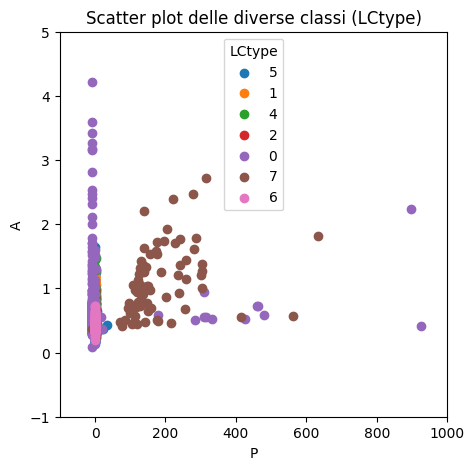

In [21]:
import matplotlib.pyplot as plt

# Crea una figura
plt.figure(figsize=(5, 5))

# Itera su ciascun tipo di stella (LCtype)
for starType in data['LCtype'].unique():
    # Filtra il dataframe per la classe corrente
    subset = data[data['LCtype'] == starType]
    
    # Crea uno scatter plot per la classe corrente
    plt.scatter(subset['P'], subset['A'], label=starType)

# Aggiungi etichette e legenda
plt.xlabel('P')
plt.ylabel('A')
plt.legend(title='LCtype')
plt.title('Scatter plot delle diverse classi (LCtype)')
plt.show()


In [48]:
from itertools import combinations

# 1. Ottieni le colonne del dataframe
colonne = data.columns

# 2. Crea tutte le combinazioni di coppie di colonne
coppie = list(combinations(colonne, 2))




105

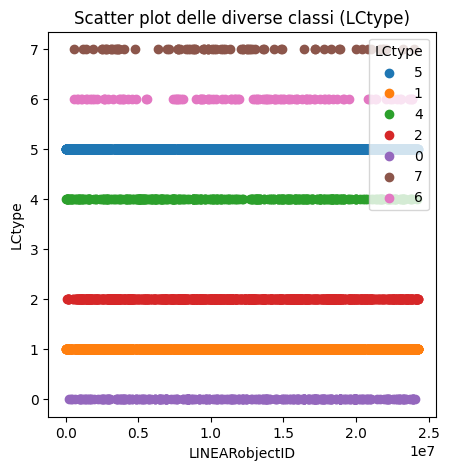

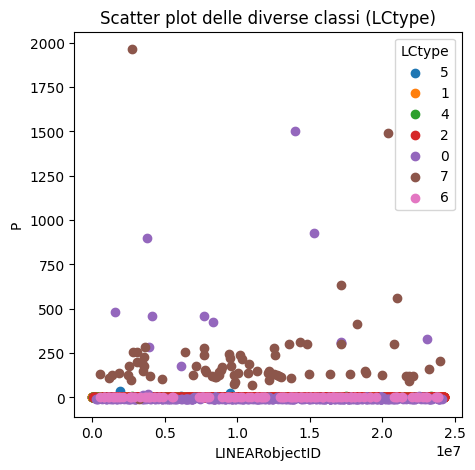

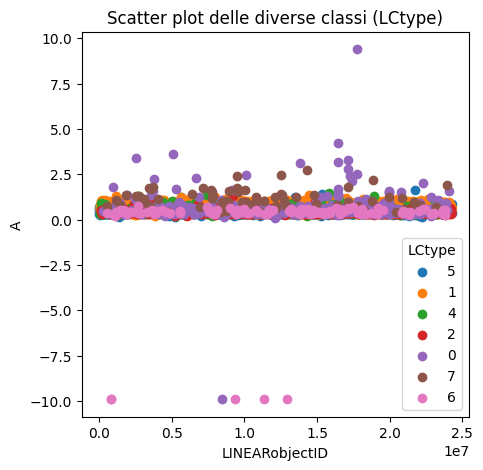

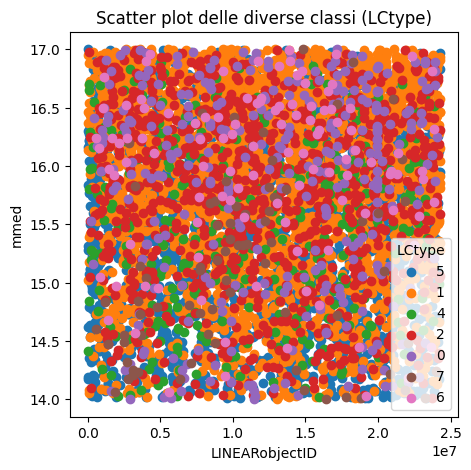

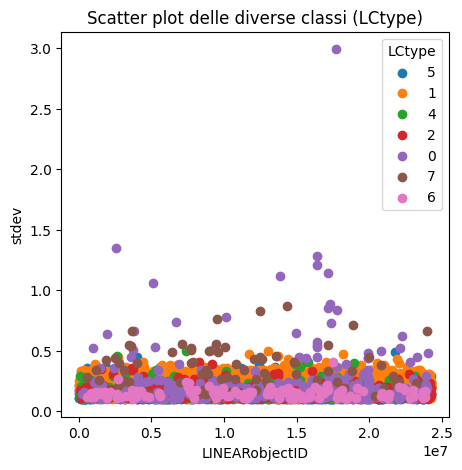

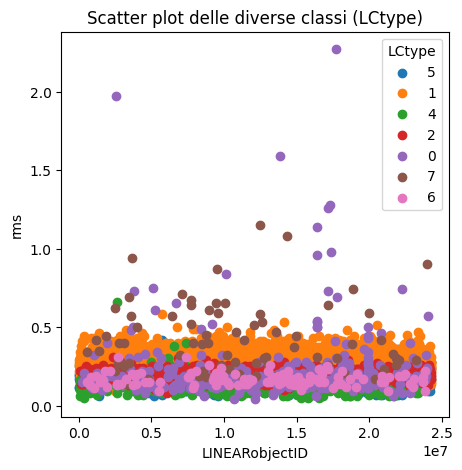

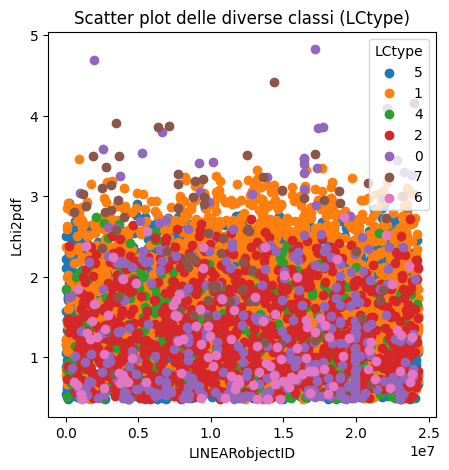

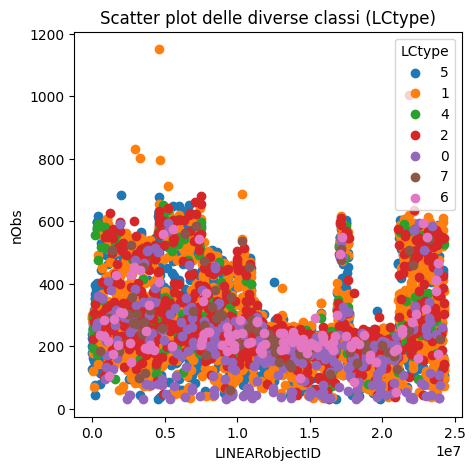

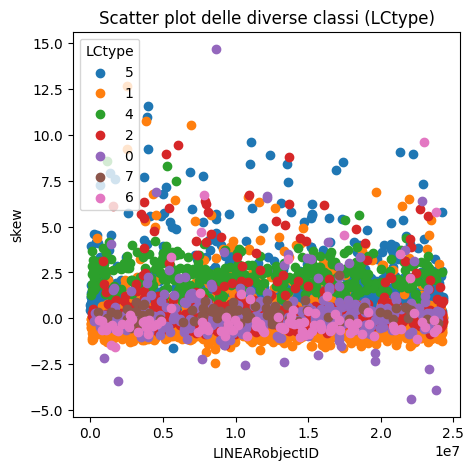

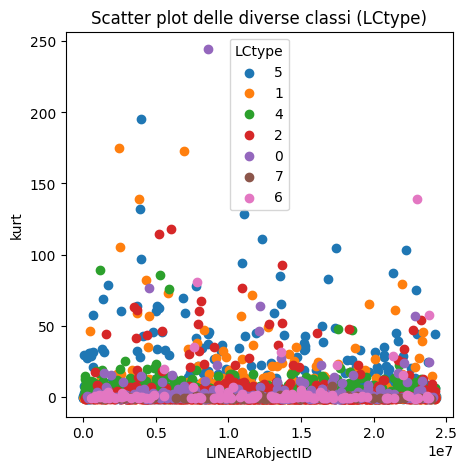

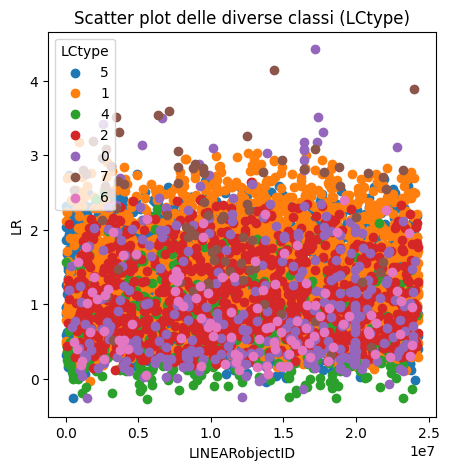

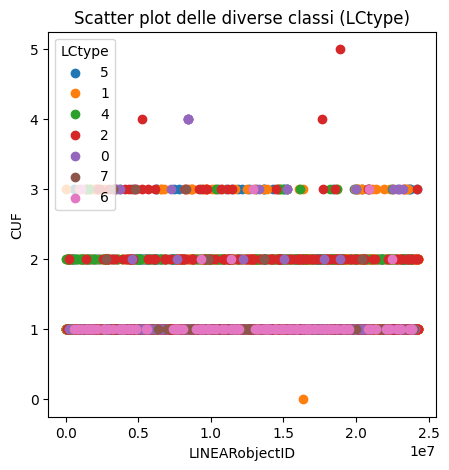

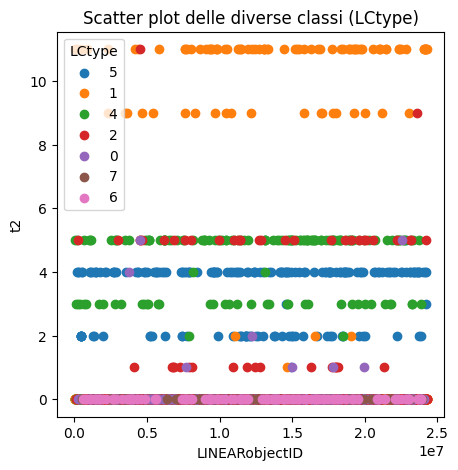

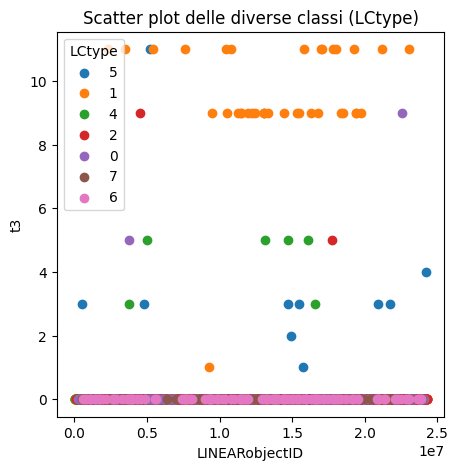

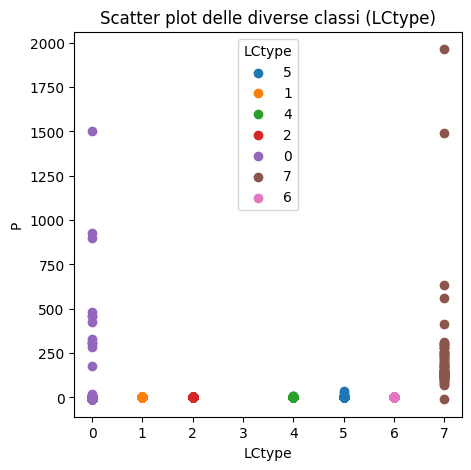

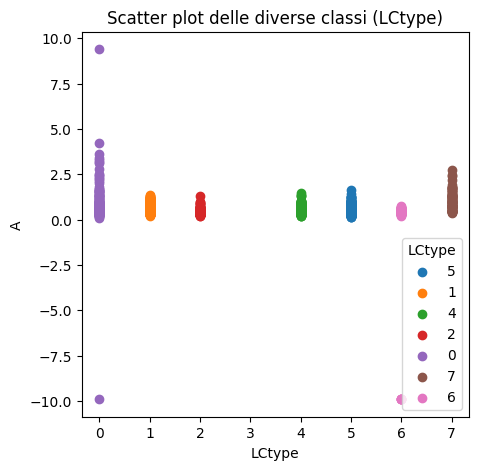

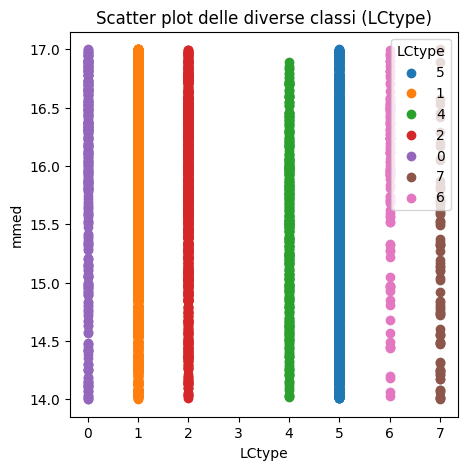

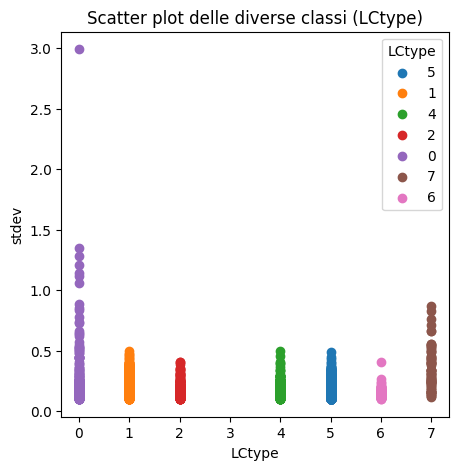

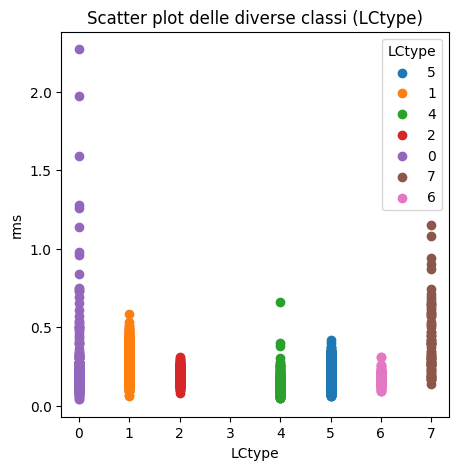

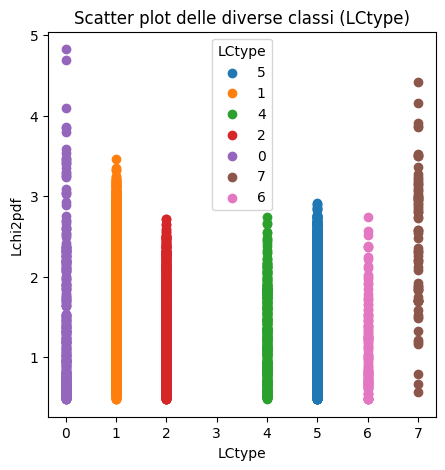

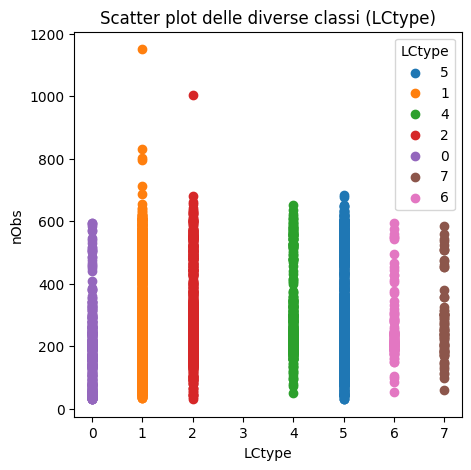

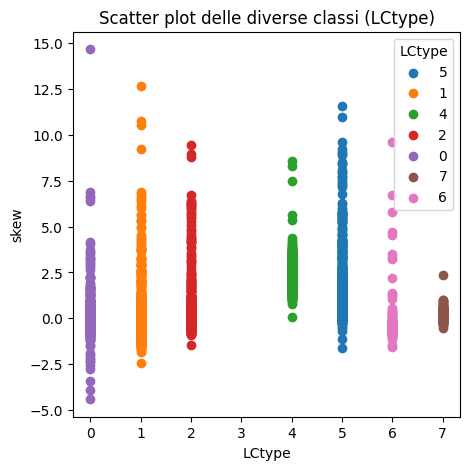

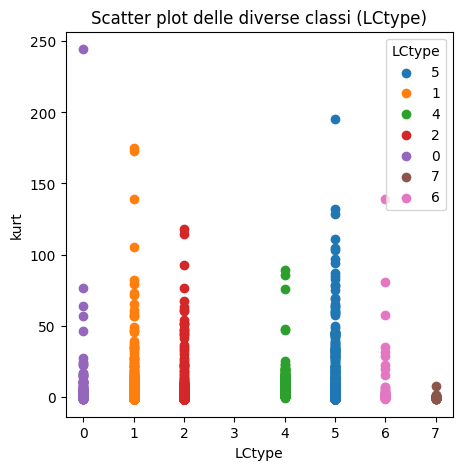

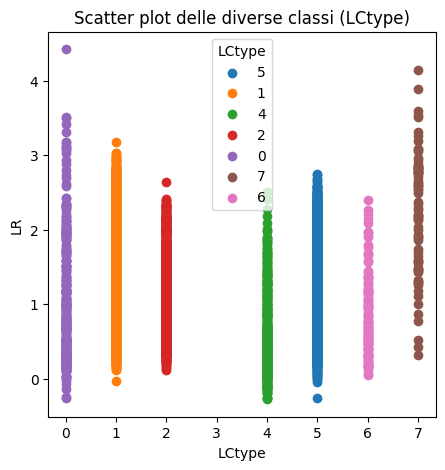

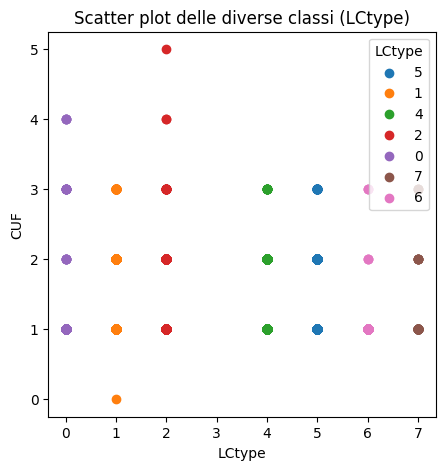

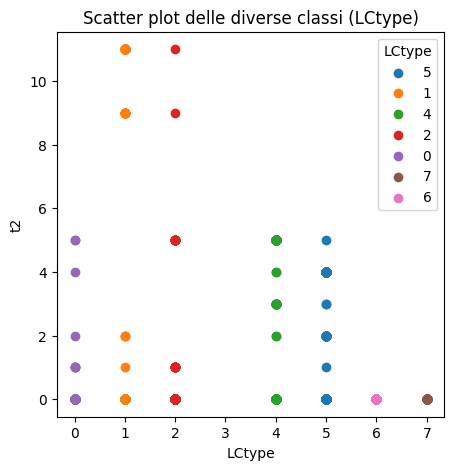

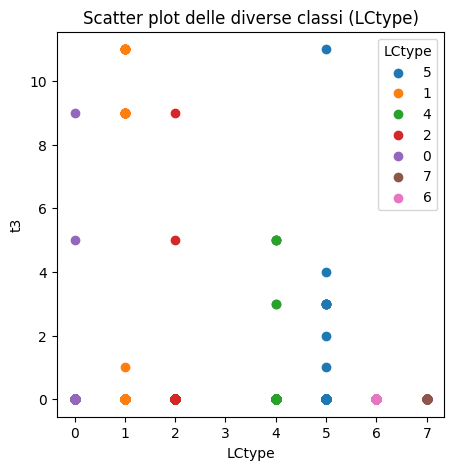

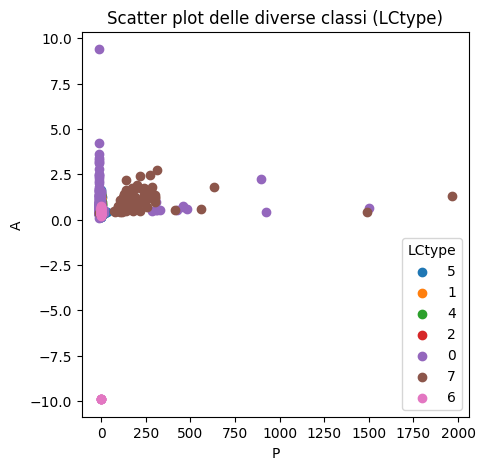

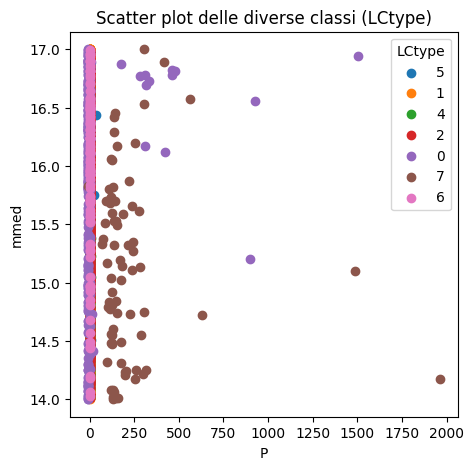

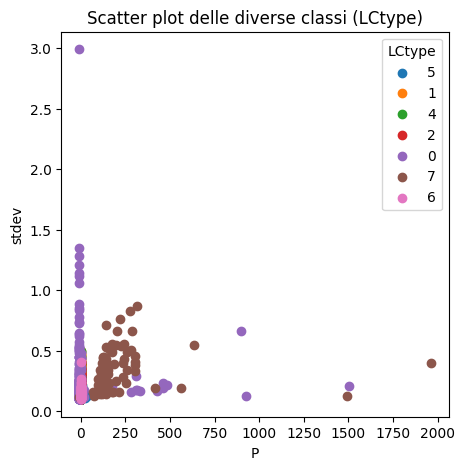

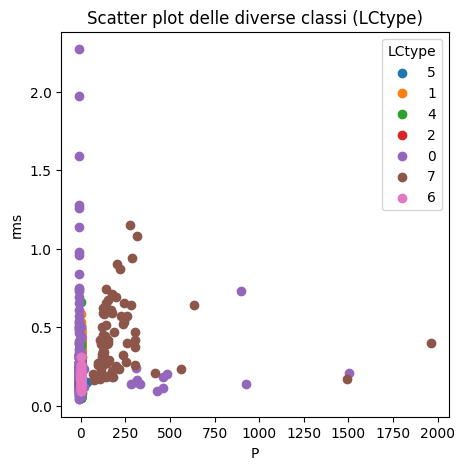

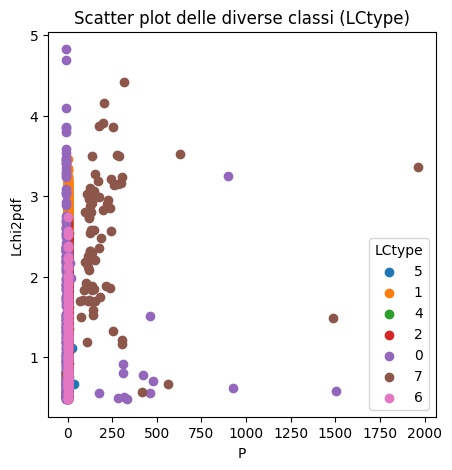

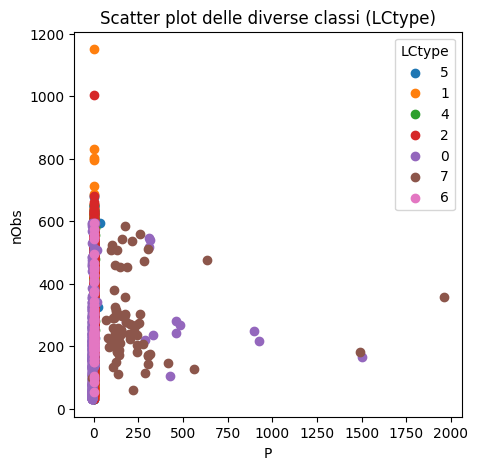

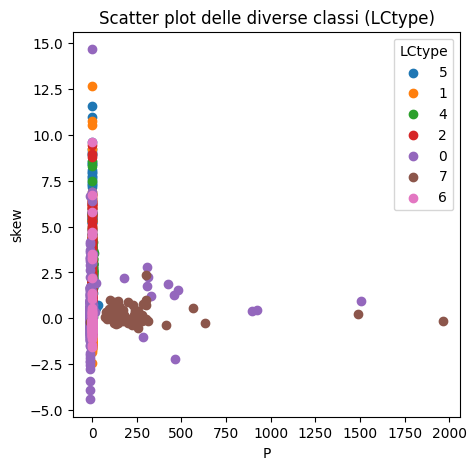

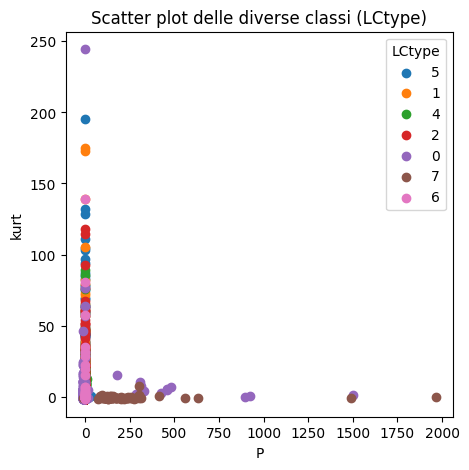

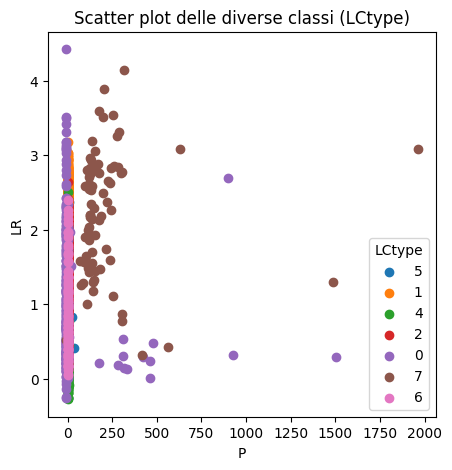

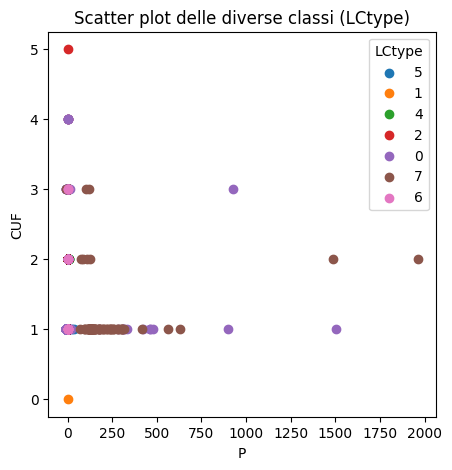

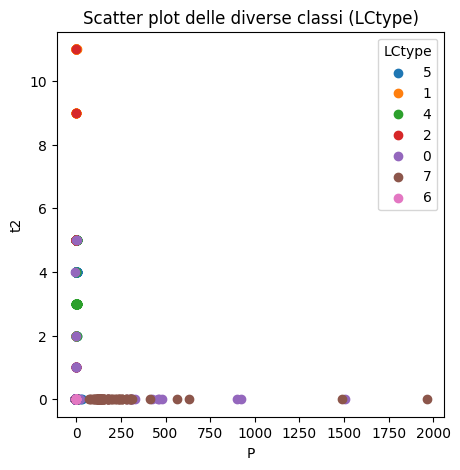

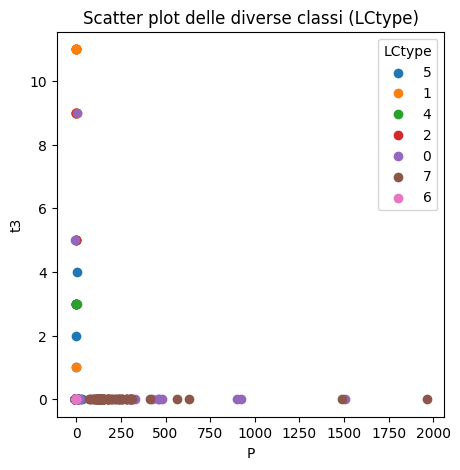

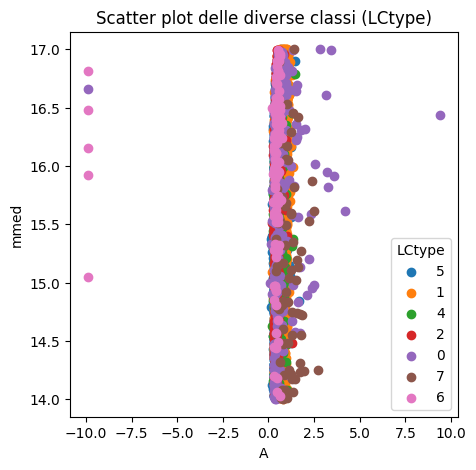

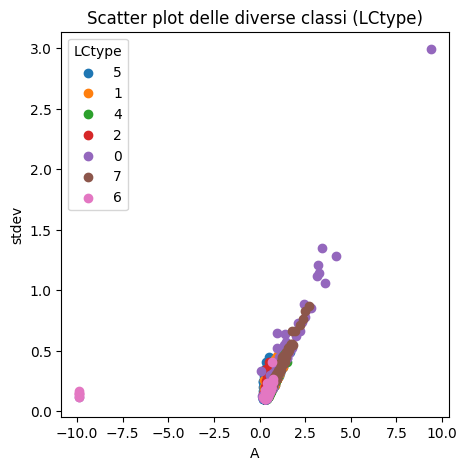

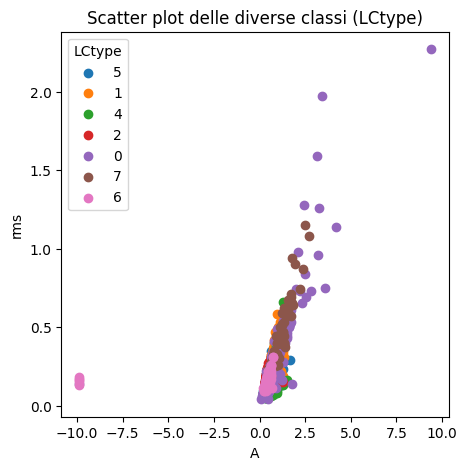

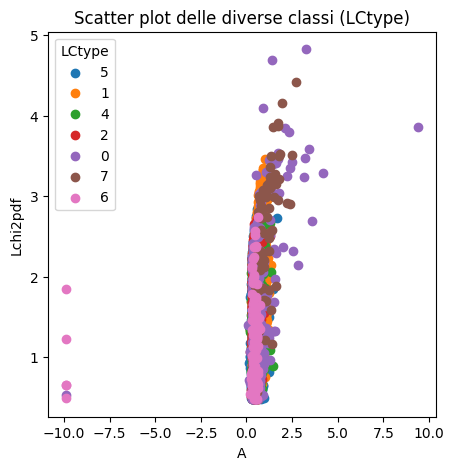

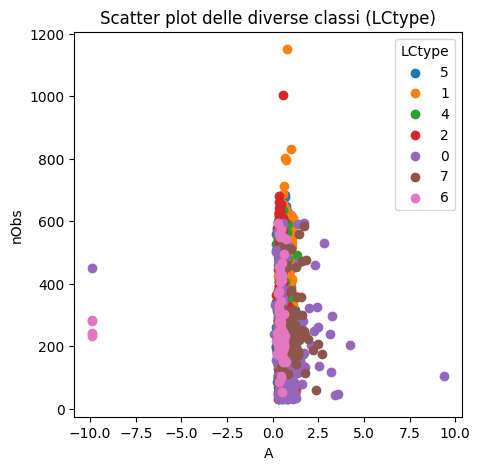

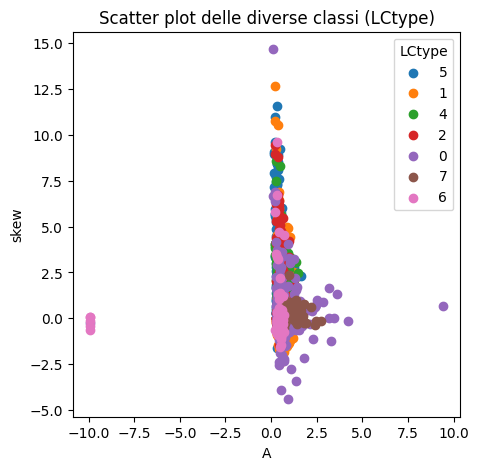

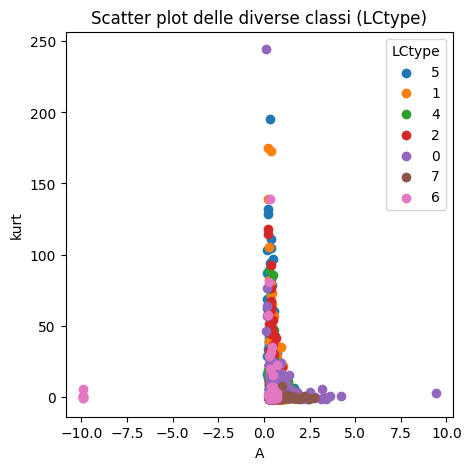

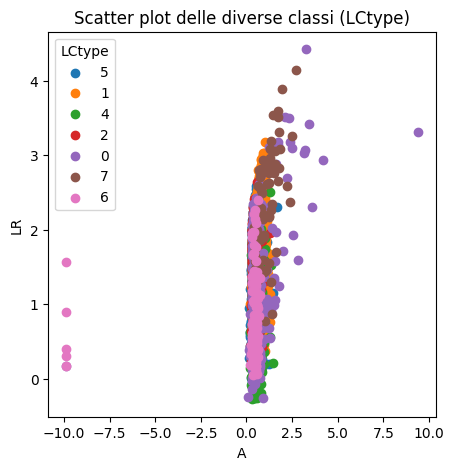

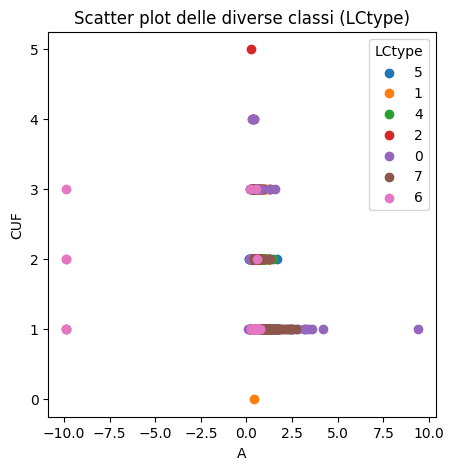

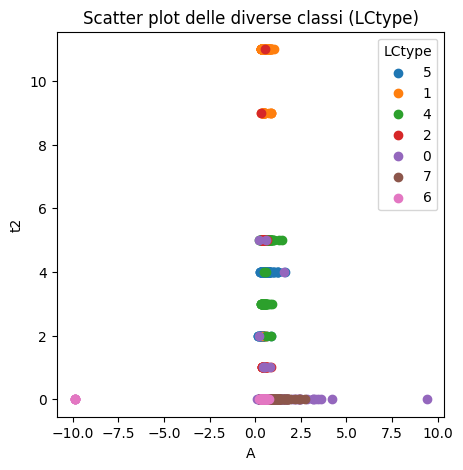

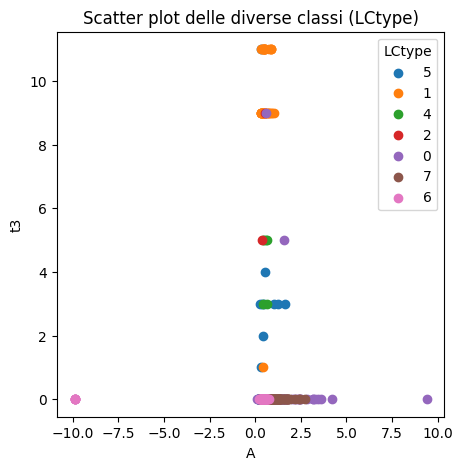

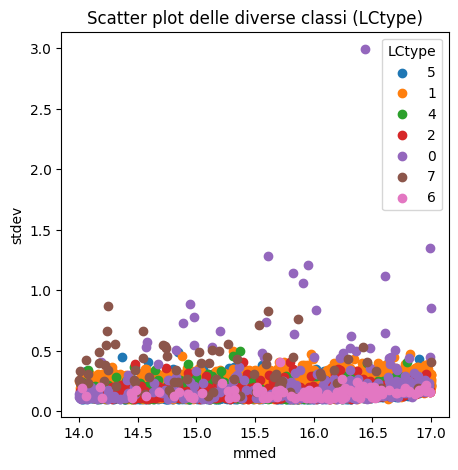

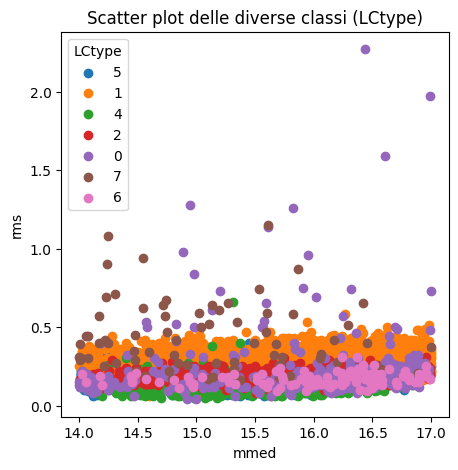

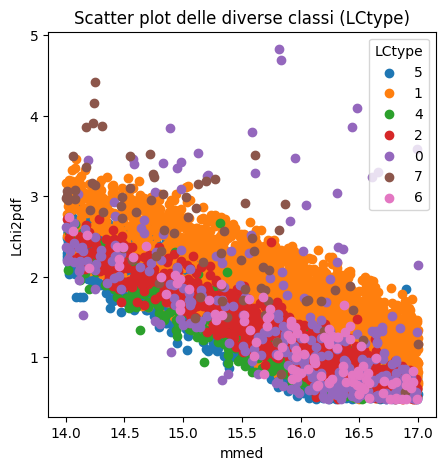

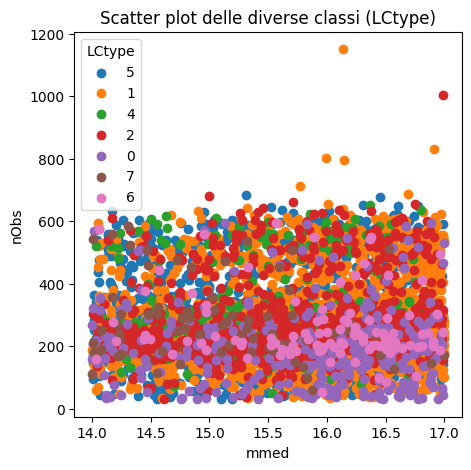

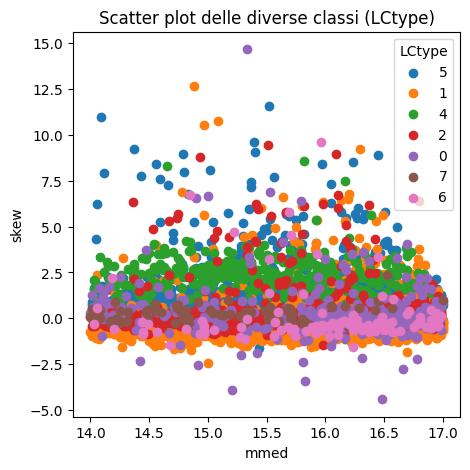

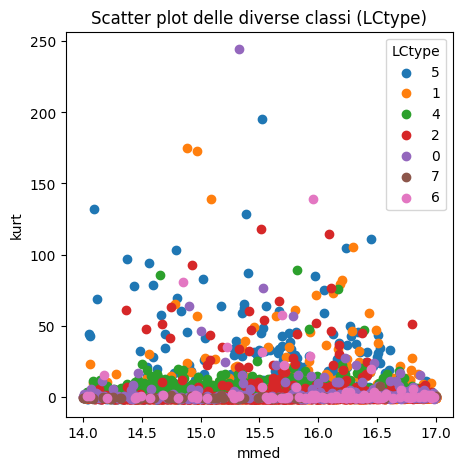

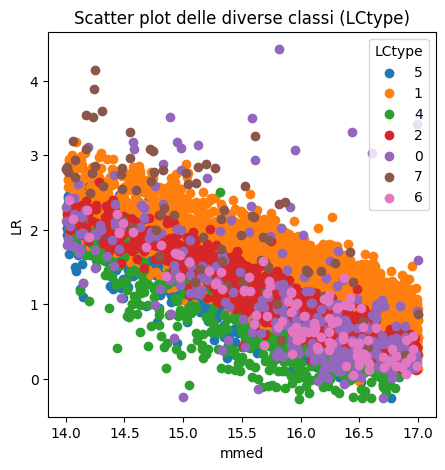

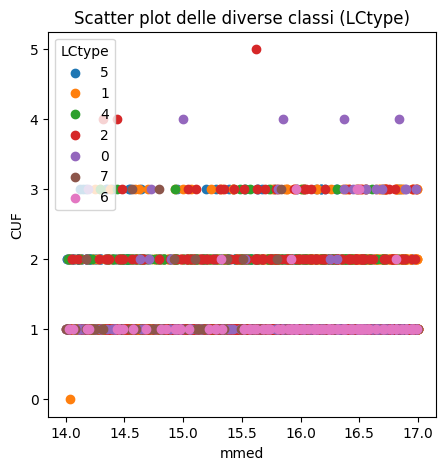

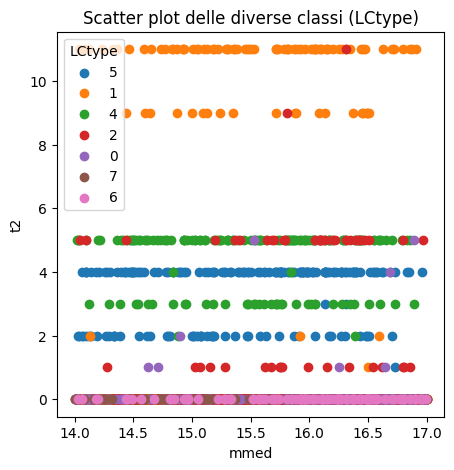

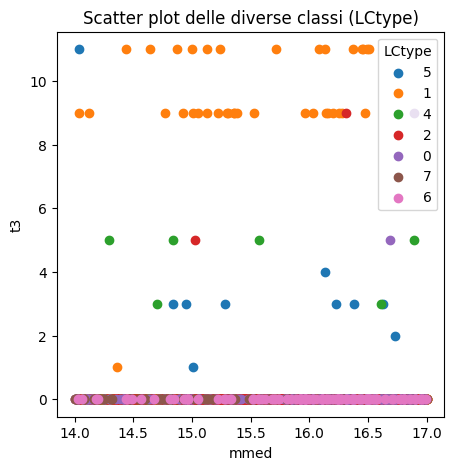

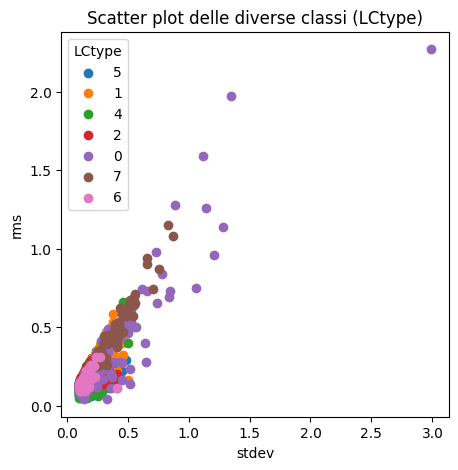

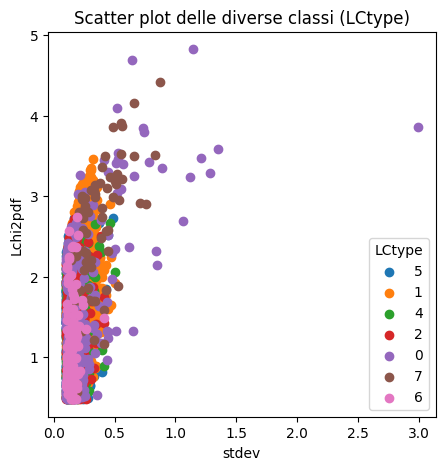

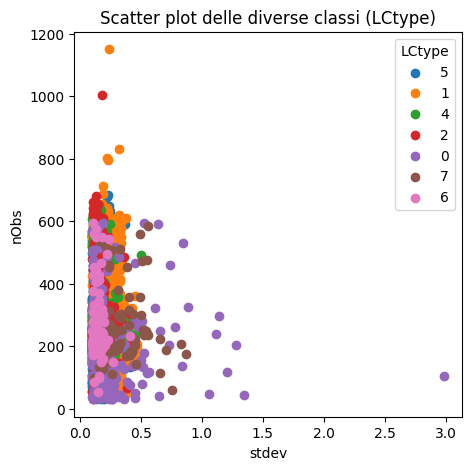

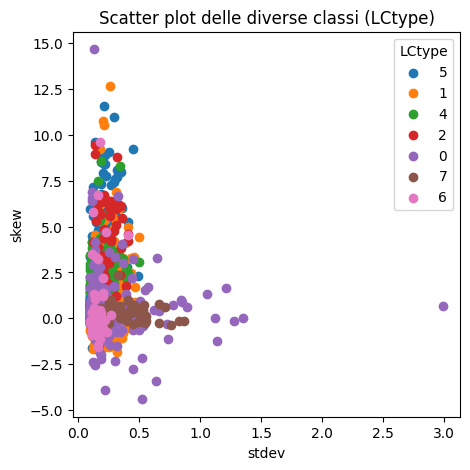

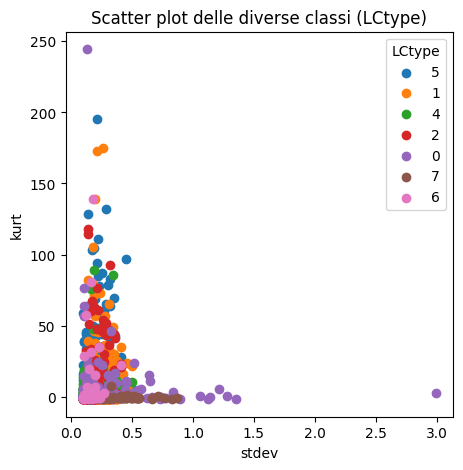

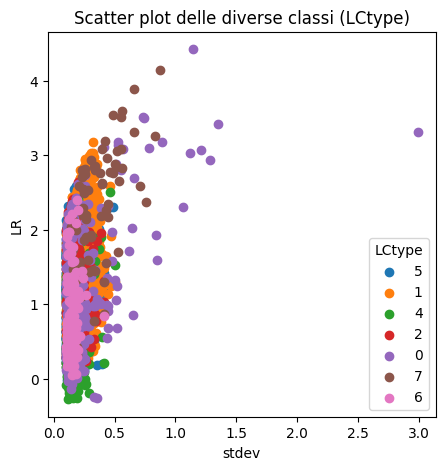

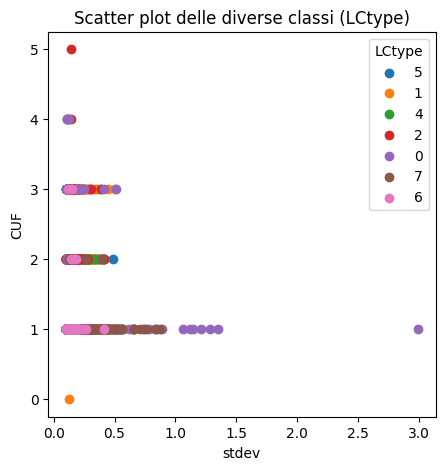

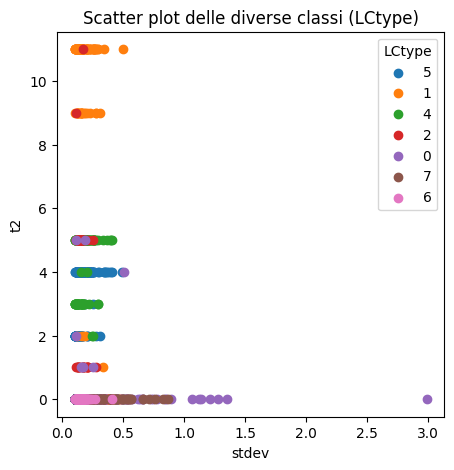

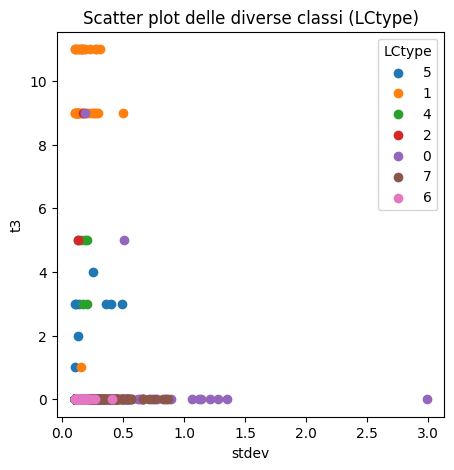

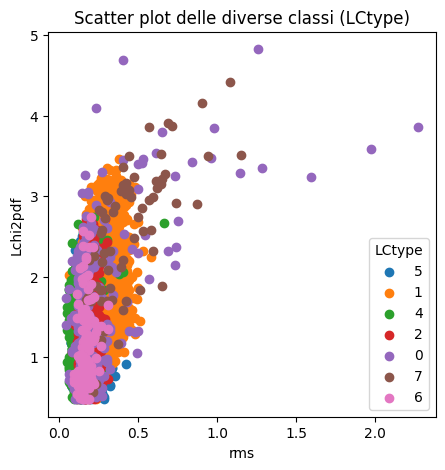

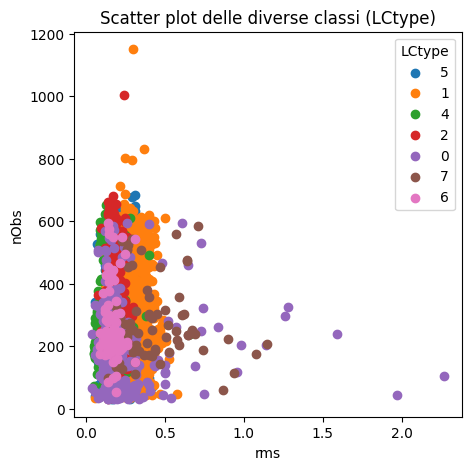

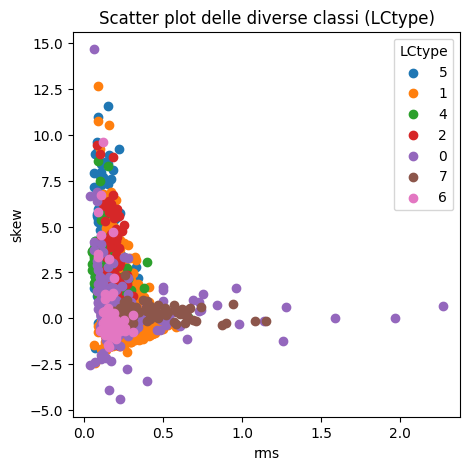

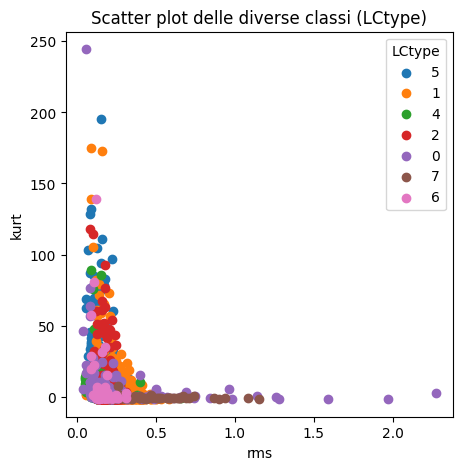

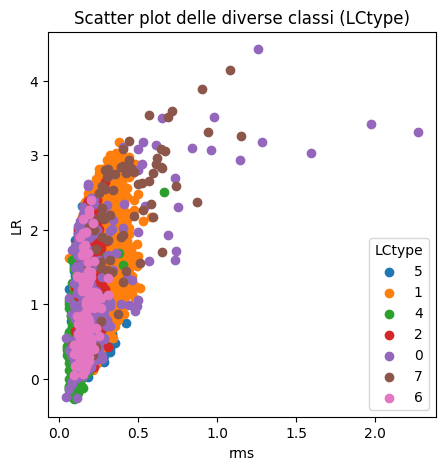

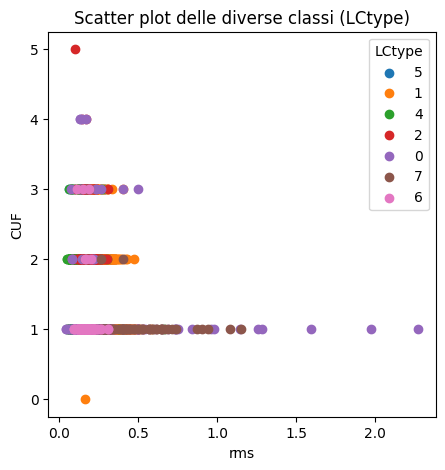

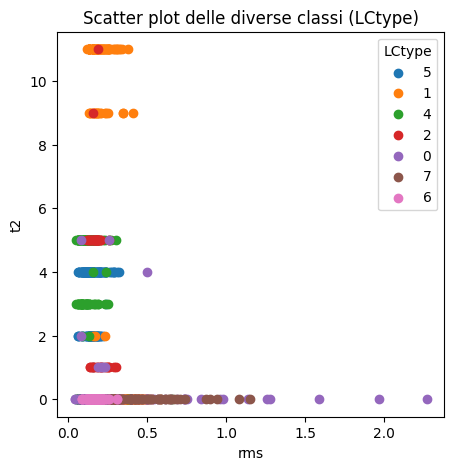

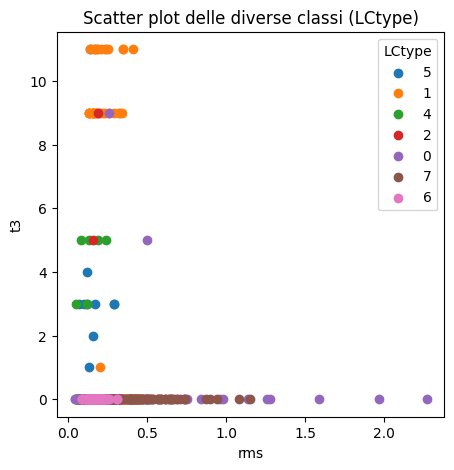

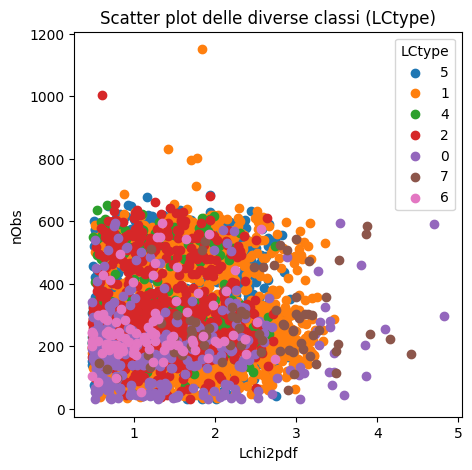

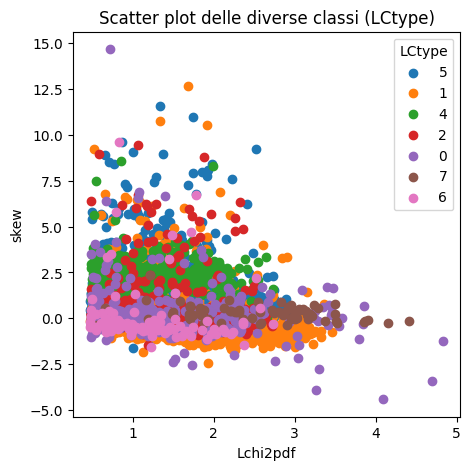

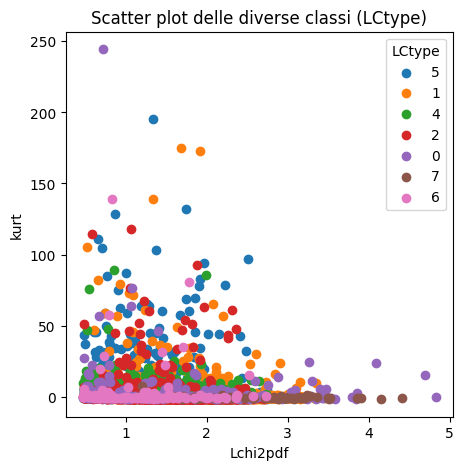

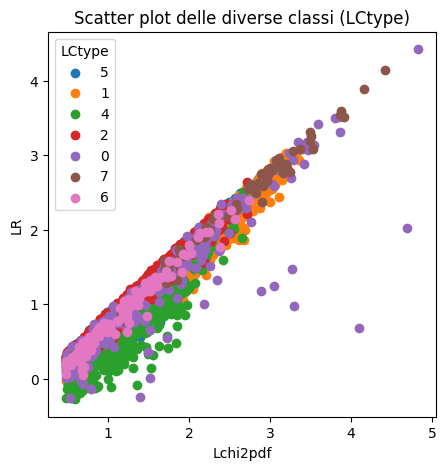

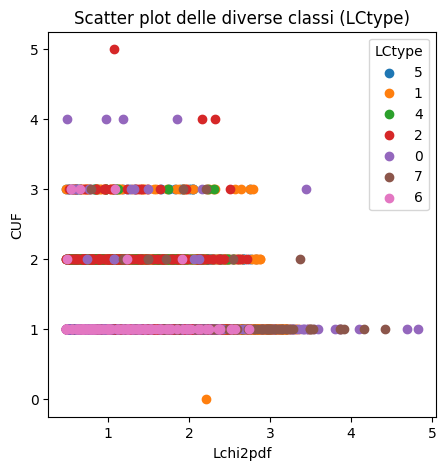

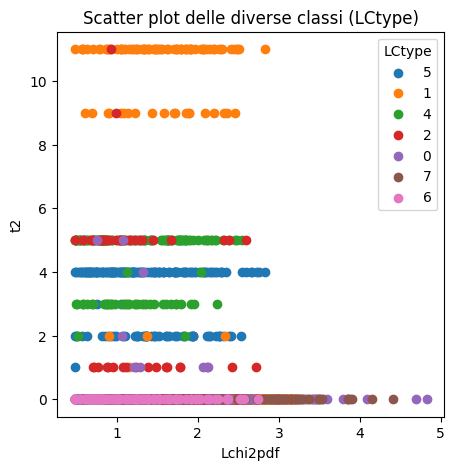

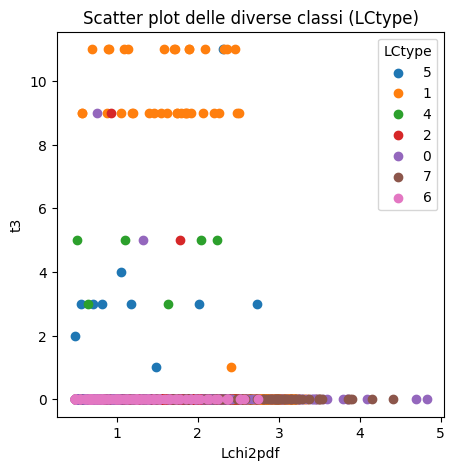

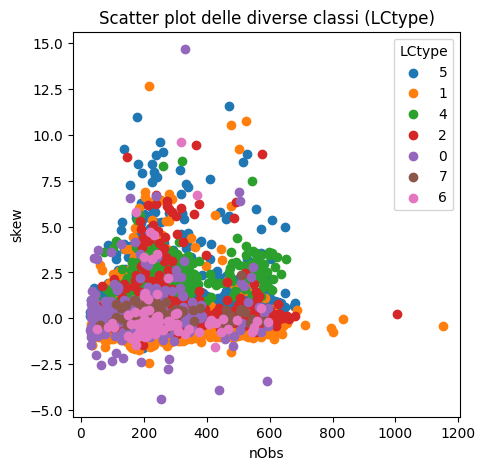

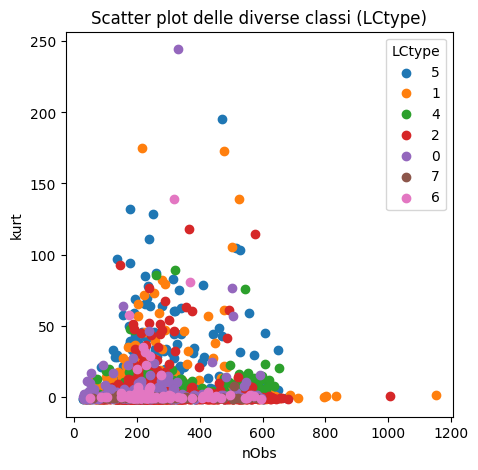

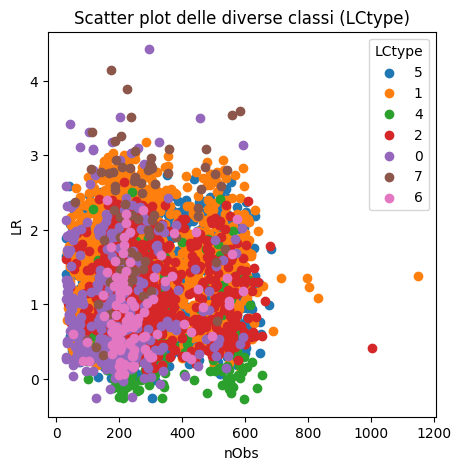

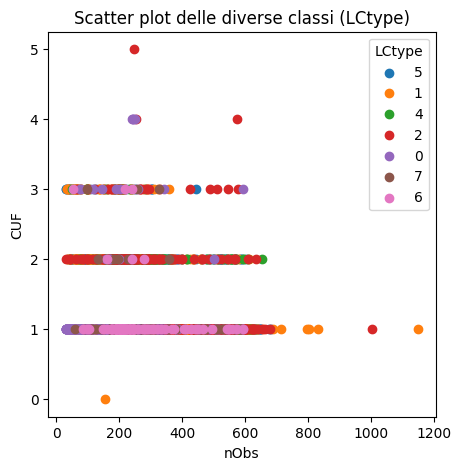

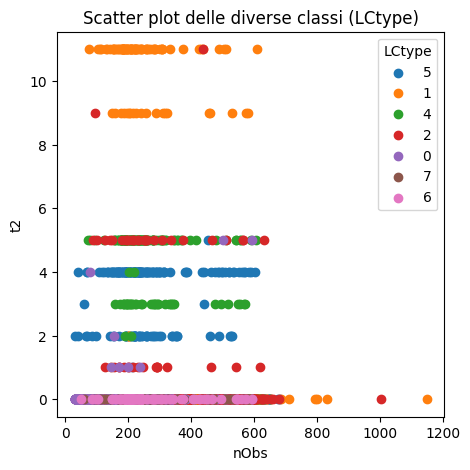

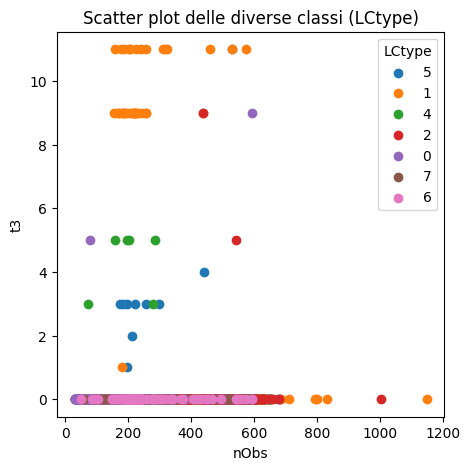

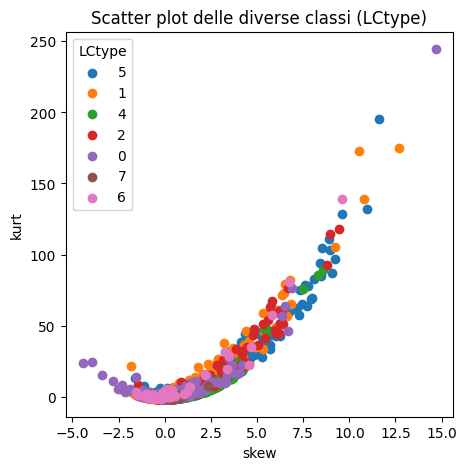

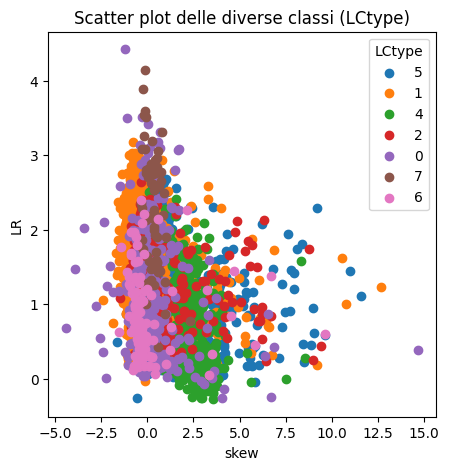

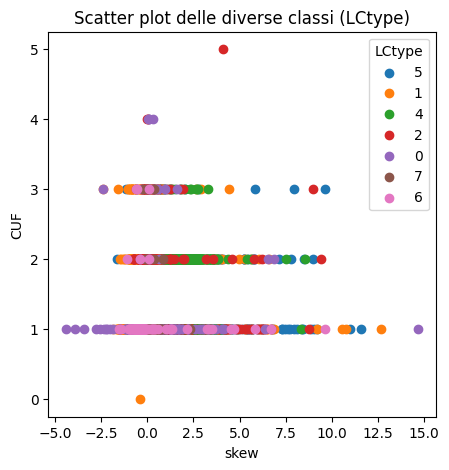

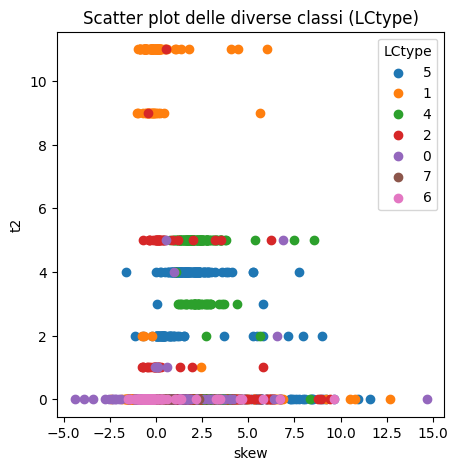

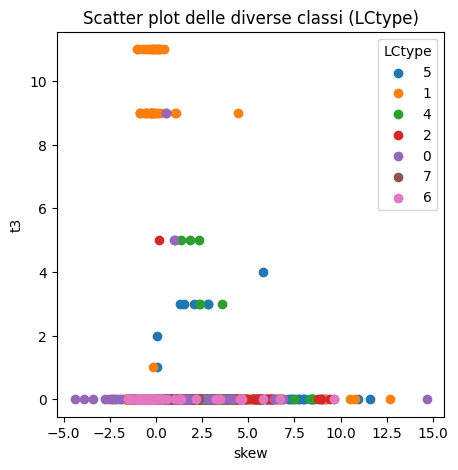

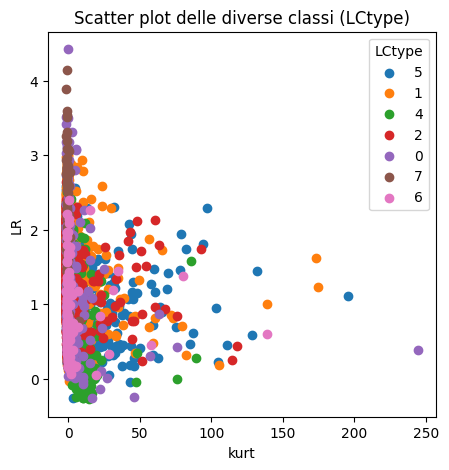

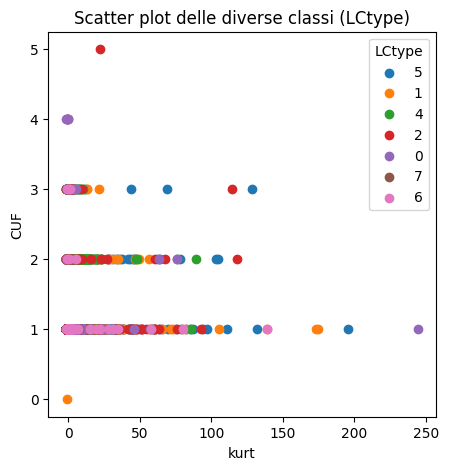

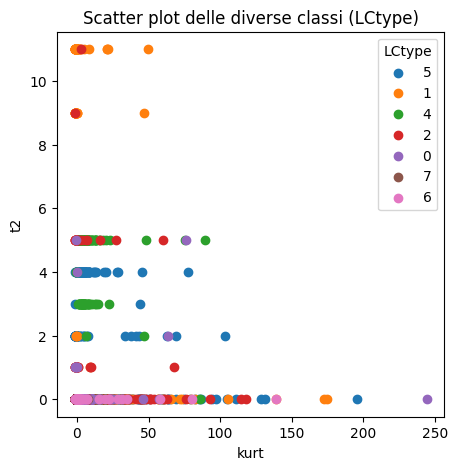

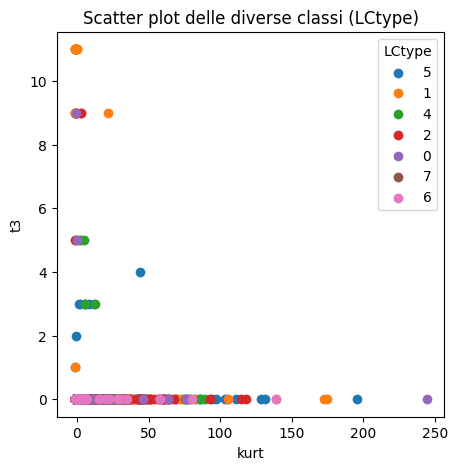

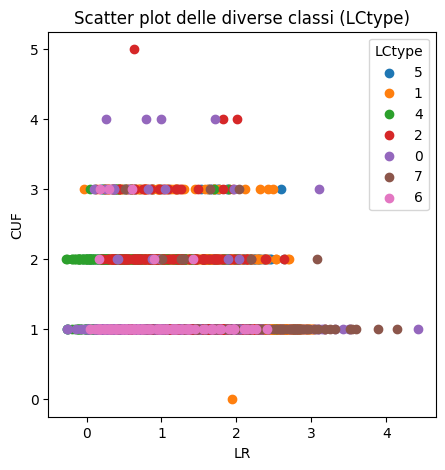

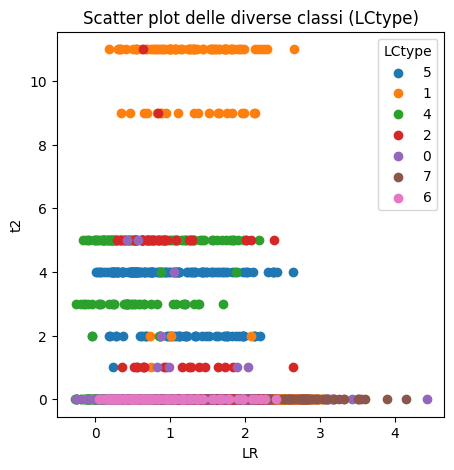

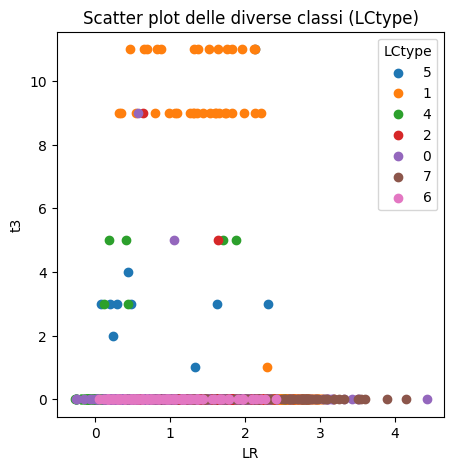

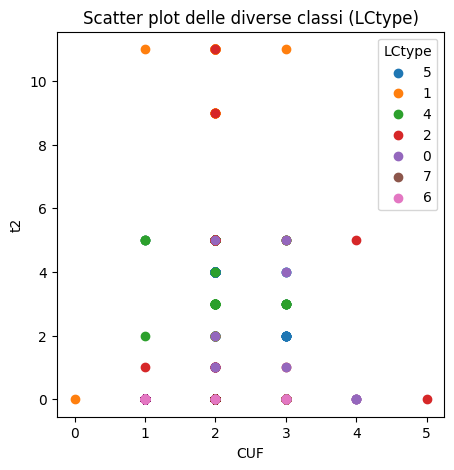

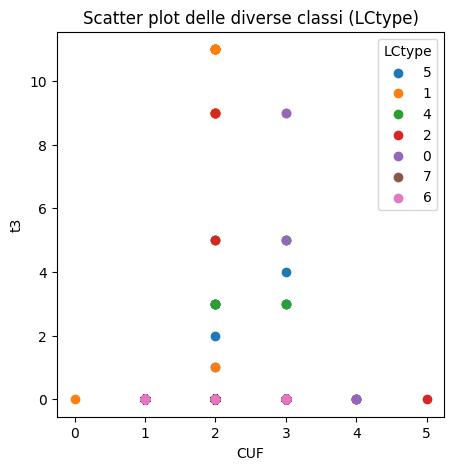

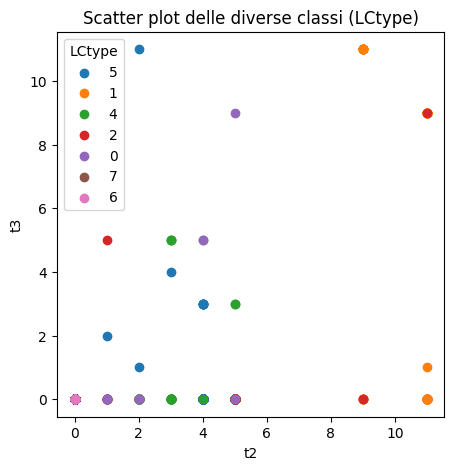

In [49]:

for coppia in coppie:

    # Crea una figura
    plt.figure(figsize=(5, 5))

    # Itera su ciascun tipo di stella (LCtype)
    for starType in data['LCtype'].unique():
        # Filtra il dataframe per la classe corrente
        subset = data[data['LCtype'] == starType]
        
        # Crea uno scatter plot per la classe corrente
        plt.scatter(subset[coppia[0]], subset[coppia[1]], label=starType)

    # Aggiungi etichette e legenda
    plt.xlabel(coppia[0])
    plt.ylabel(coppia[1])
    plt.legend(title='LCtype')
    plt.title('Scatter plot delle diverse classi (LCtype)')
    plt.show()